In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('DA_job_dataset_cleaned.csv',index_col=0)
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,min_salary,max_salary,avg_salary,Company_name_text,State,Age of company,python_y,sql_y,aws_y,spark_y,tableau_y,excel_y,r_studio_y,power_bi_y,desc_len,seniority
0,Data Analyst,$42K-$75K (Glassdoor est.),DEPARTMENT: Analytics\nPOSITION SUMMARY\nNewDa...,3.9,NewDay USA\n3.9,"Fulton, MD",-1,501 to 1000 Employees,1999,Company - Private,Lending,Finance,Unknown / Non-Applicable,-1,0,42000,75000,58500.0,NewDay USA,MD,21,0,1,0,0,0,1,0,0,2032,na
1,Market Data Analyst,$59K-$104K (Glassdoor est.),"Thursday, October 22, 2020\n\nMarket Support S...",3.8,ISO New England\n3.8,"Holyoke, MA",-1,501 to 1000 Employees,1997,Nonprofit Organization,Utilities,"Oil, Gas, Energy & Utilities",Unknown / Non-Applicable,-1,0,59000,104000,81500.0,ISO New England,MA,23,0,1,0,0,0,1,0,0,3183,na


In [3]:
df.drop(['Salary Estimate','Company Name','Headquarters','Competitors'],axis=1,inplace=True)
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'min_salary', 'max_salary', 'avg_salary', 'Company_name_text', 'State',
       'Age of company', 'python_y', 'sql_y', 'aws_y', 'spark_y', 'tableau_y',
       'excel_y', 'r_studio_y', 'power_bi_y', 'desc_len', 'seniority'],
      dtype='object')

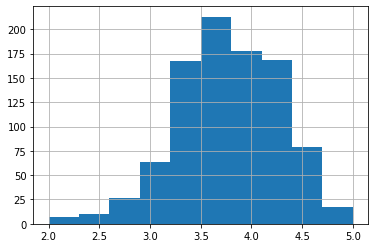

In [4]:
df['Rating'].hist()
#Close to Nomral Distribution

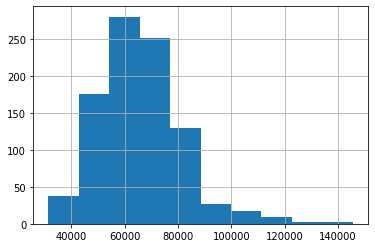

In [5]:
df['avg_salary'].hist()

In [6]:
 corr = df[['avg_salary','Rating','desc_len','Age of company']].corr()

Text(0.5, 1.0, 'Correlation between continues variable')

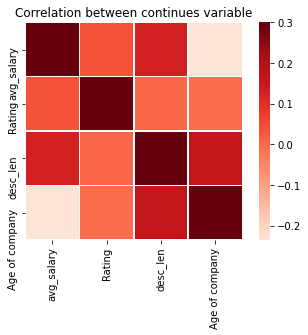

In [7]:
# Numerial Variable
sns.heatmap(corr,vmax=.3,center=0,cmap = 'Reds',linewidths=0.5,square=True)
plt.title('Correlation between continues variable')

In [8]:
#Catogerial Variable
df_cat  = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','avg_salary', 'Company_name_text', 'State',
       'Age of company', 'python_y', 'sql_y', 'aws_y', 'spark_y', 'tableau_y',
       'excel_y', 'r_studio_y', 'power_bi_y', 'desc_len', 'seniority']]

In [9]:
df_cat.columns

Index(['Location', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'avg_salary', 'Company_name_text', 'State', 'Age of company',
       'python_y', 'sql_y', 'aws_y', 'spark_y', 'tableau_y', 'excel_y',
       'r_studio_y', 'power_bi_y', 'desc_len', 'seniority'],
      dtype='object')

# Using Barplot to explore categorical features.

The Chart for Location: total = 253


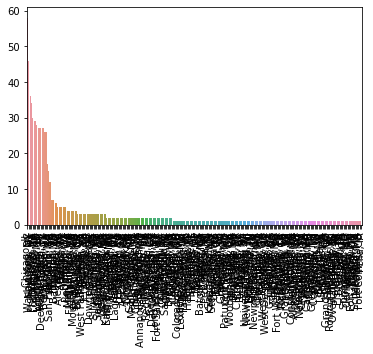

The Chart for Size: total = 8


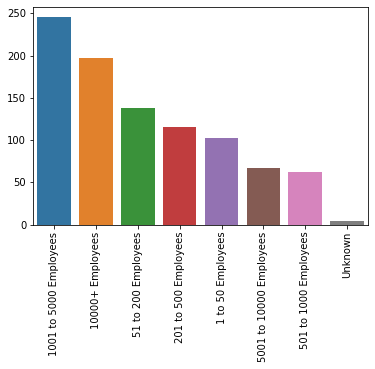

The Chart for Type of ownership: total = 11


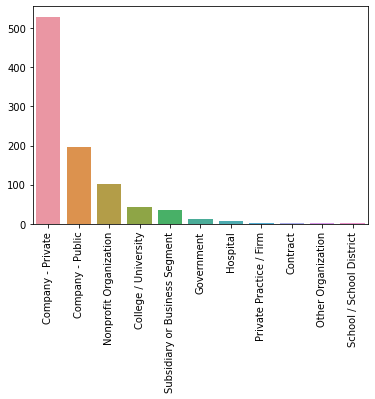

The Chart for Industry: total = 73


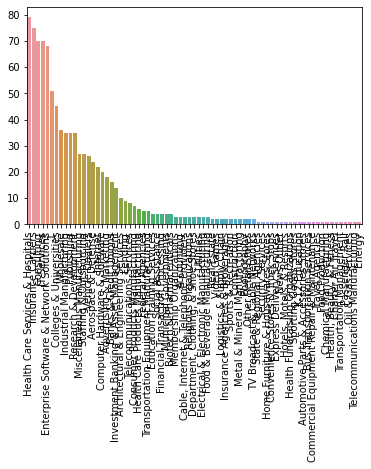

The Chart for Sector: total = 25


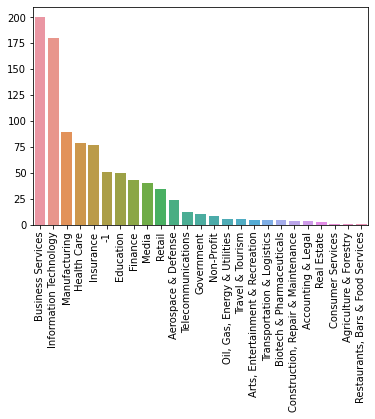

The Chart for Revenue: total = 13


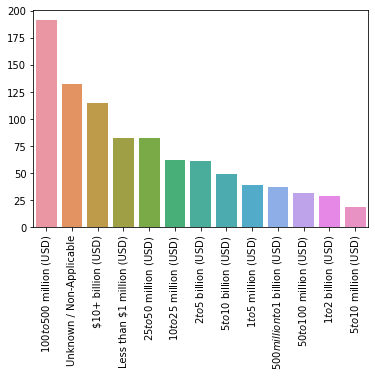

The Chart for avg_salary: total = 136


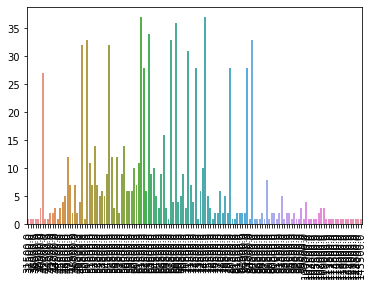

The Chart for Company_name_text: total = 401


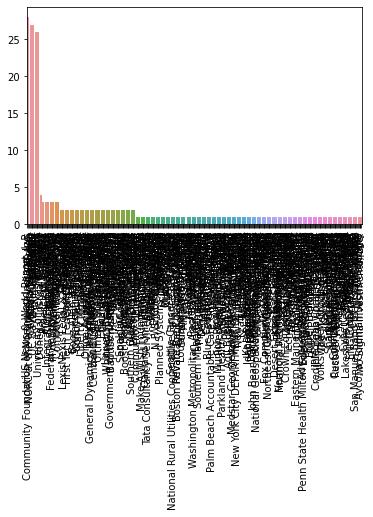

The Chart for State: total = 44


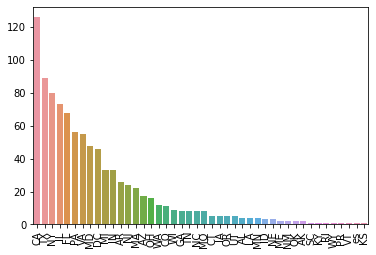

The Chart for Age of company: total = 129


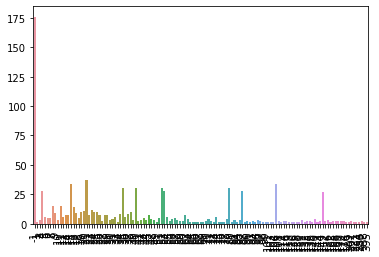

The Chart for python_y: total = 2


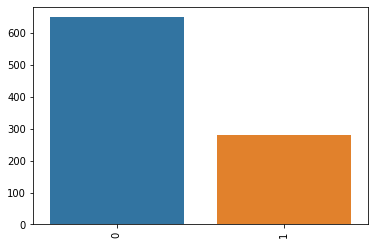

The Chart for sql_y: total = 2


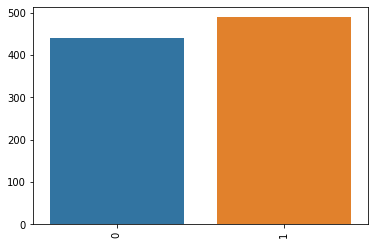

The Chart for aws_y: total = 2


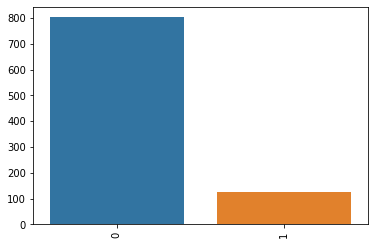

The Chart for spark_y: total = 2


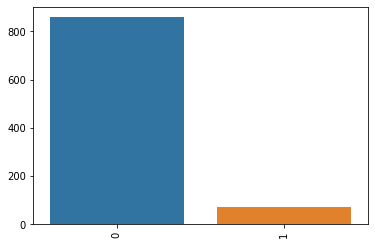

The Chart for tableau_y: total = 2


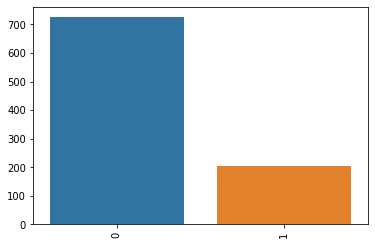

The Chart for excel_y: total = 2


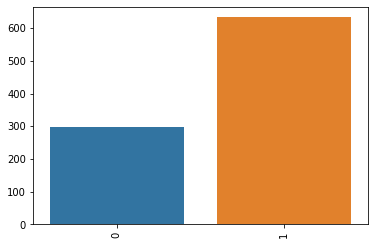

The Chart for r_studio_y: total = 2


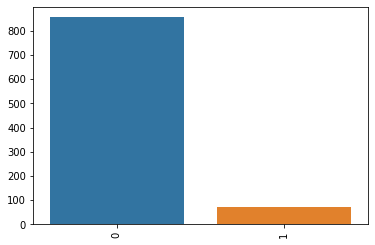

The Chart for power_bi_y: total = 2


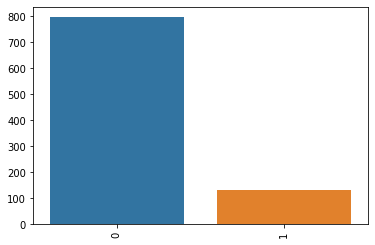

The Chart for desc_len: total = 429


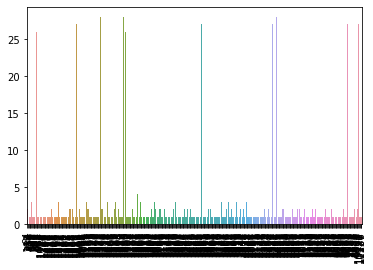

The Chart for seniority: total = 3


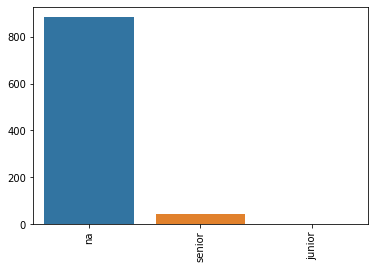

In [10]:

for c in df_cat.columns:
    types = df_cat[c].value_counts().index
    amount = df_cat[c].value_counts().values
    print('The Chart for %s: total = %d' % (c,len(types)))
    chart = sns.barplot(x=types,y=amount, data=df_cat)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

# Using the pivot table to how avg_salary varies among different categories.

In [11]:

pd.pivot_table(df_cat,values='avg_salary',index='Size').sort_values('avg_salary',ascending=False)

,avg_salary
Size,
501 to 1000 Employees,71677.419355
1 to 50 Employees,71102.941176
10000+ Employees,67870.558376
5001 to 10000 Employees,65179.104478
201 to 500 Employees,64591.304348
1001 to 5000 Employees,63744.897959
51 to 200 Employees,62851.449275
Unknown,62125.000000


In [12]:

pd.pivot_table(df_cat,values='avg_salary',index='seniority',aggfunc=np.mean).sort_values('avg_salary',ascending=False)

,avg_salary
seniority,
senior,90197.674419
na,64870.056497
junior,56500.000000


In [13]:
pd.pivot_table(df_cat,values='avg_salary',index='Type of ownership',aggfunc=['mean','count']).sort_values(('mean','avg_salary'),ascending=False)



,mean,count
,avg_salary,avg_salary
Type of ownership,,
School / School District,75000.000000,1
Company - Public,67807.106599,197
Contract,67500.000000,1
Subsidiary or Business Segment,67263.888889,36
Company - Private,67005.671078,529
Nonprofit Organization,66647.058824,102
Government,66318.181818,11
Hospital,61166.666667,6


In [14]:
for i in df_cat.drop(['avg_salary','Company_name_text','Location'],axis =1).columns:
    p_table = pd.pivot_table(df_cat,values='avg_salary',index=i,aggfunc=['mean','count']).sort_values(('mean','avg_salary'),ascending=False)
    print('Category: '+i)
    print(p_table)
    print('\n')


Category: Size
                                 mean      count
                           avg_salary avg_salary
Size                                            
501 to 1000 Employees    71677.419355         62
1 to 50 Employees        71102.941176        102
10000+ Employees         67870.558376        197
5001 to 10000 Employees  65179.104478         67
201 to 500 Employees     64591.304348        115
1001 to 5000 Employees   63744.897959        245
51 to 200 Employees      62851.449275        138
Unknown                  62125.000000          4


Category: Type of ownership
                                        mean      count
                                  avg_salary avg_salary
Type of ownership                                      
School / School District        75000.000000          1
Company - Public                67807.106599        197
Contract                        67500.000000          1
Subsidiary or Business Segment  67263.888889         36
Company - Private       

Category: desc_len
                   mean      count
             avg_salary avg_salary
desc_len                          
7354      145500.000000          1
6049      144000.000000          1
1144      129000.000000          1
10021     127000.000000          1
3705      122000.000000          1
5737      120000.000000          1
3684      119000.000000          1
3028      118000.000000          1
4105      115500.000000          1
2604      114000.000000          1
3308      113500.000000          1
3587      112000.000000          1
3824      111500.000000          1
2900      110000.000000          1
3615      109000.000000          1
4048      109000.000000          2
5139      108000.000000          1
5734      108000.000000          1
7138      108000.000000          1
934       107000.000000          2
3719      105500.000000          1
1883      104000.000000          1
5437      103500.000000          1
3482      102000.000000          1
2331      100000.000000          3
3

In [15]:
df_cat.columns

Index(['Location', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'avg_salary', 'Company_name_text', 'State', 'Age of company',
       'python_y', 'sql_y', 'aws_y', 'spark_y', 'tableau_y', 'excel_y',
       'r_studio_y', 'power_bi_y', 'desc_len', 'seniority'],
      dtype='object')